# Naives Bayes Classifier and Support Vector Machine Analysis

##### Load Packages for analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import naive_bayes
from sklearn.metrics import classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns; sns.set()

In [2]:
train_data_norm = pd.read_csv('../data/train_data_z.csv')
test_data_norm = pd.read_csv('../data/test_data_z.csv')
train_target = pd.read_csv('../data/train_target.csv', index_col=0)
test_target = pd.read_csv('../data/test_target.csv',index_col=0)
train_PCA1 = pd.read_csv('../data/train_pca1.csv', header = None, delimiter = ' ')
test_PCA1 = pd.read_csv('../data/test_pca1.csv', header = None, delimiter = ' ')
train_PCA2 = pd.read_csv('../data/train_pca2.csv', header = None, delimiter = ' ')
test_PCA2 = pd.read_csv('../data/test_pca2.csv',header = None, delimiter = ' ')
train_target_ravel = np.array(train_target).ravel()
test_target_ravel = np.array(test_target).ravel()
cats = train_target['price_range'].unique()

In [3]:
train_target.shape

(1600, 1)

# Naives Bayes

##### Gaussian - Full Normalized Data

In [4]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train_data_norm,train_target_ravel)
nbclfPred = nbclf.predict(test_data_norm)
trainScore = nbclf.score(train_data_norm, train_target)
testScore = nbclf.score(test_data_norm, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.5375 
Testing Score: 0.555


[[55  6  0  0]
 [39 71 42 12]
 [ 0  3  5  4]
 [ 0 26 46 91]]


Text(39.5, 0.5, 'True label')

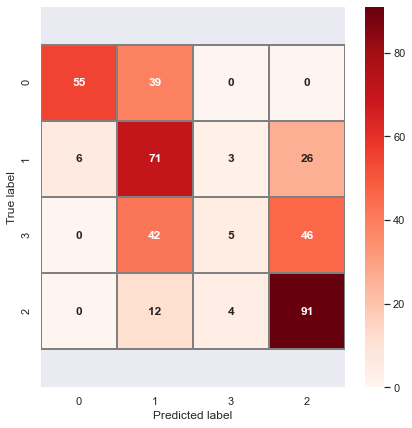

In [5]:
cm = confusion_matrix(nbclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Gaussian - PCA1

In [6]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train_PCA1,train_target_ravel)
nbclfPred = nbclf.predict(test_PCA1)
trainScore = nbclf.score(train_PCA1, train_target)
testScore = nbclf.score(test_PCA1, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.464375 
Testing Score: 0.4825


[[69 34  7  0]
 [ 9 16 19  2]
 [ 6 18 14 11]
 [10 38 53 94]]


Text(39.5, 0.5, 'True label')

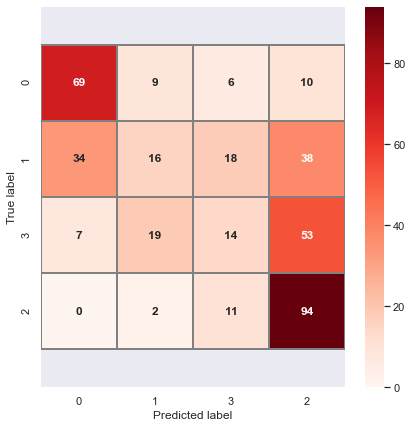

In [7]:
cm = confusion_matrix(nbclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Gaussian - PCA2

In [8]:
nbclf = naive_bayes.GaussianNB()
nbclf = nbclf.fit(train_PCA2,train_target_ravel)
nbclfPred = nbclf.predict(test_PCA2)
trainScore = nbclf.score(train_PCA2, train_target)
testScore = nbclf.score(test_PCA2, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.471875 
Testing Score: 0.5


[[56 15  2  0]
 [26 46 34  7]
 [ 2  7  8 10]
 [10 38 49 90]]


Text(39.5, 0.5, 'True label')

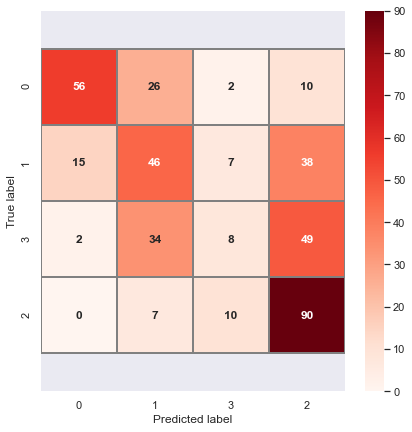

In [9]:
cm = confusion_matrix(nbclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Multinomial - Full Data

Normalize to a 0,1 range for Multinomial Naive Bayes because it doesn't accept negatives

In [10]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_data_norm)
train_data_0_1 = min_max_scaler.fit_transform(train_data_norm)
test_data_0_1 = min_max_scaler.fit_transform(test_data_norm)

In [11]:
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbmclf.fit(train_data_0_1,train_target_ravel)
nbmclfPred = nbmclf.predict(test_data_0_1)
trainScore = nbmclf.score(train_data_0_1, train_target)
testScore = nbmclf.score(test_data_0_1, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.515 
Testing Score: 0.47


[[83 41 13  0]
 [11 33 22  9]
 [ 0 25 35 61]
 [ 0  7 23 37]]


Text(39.5, 0.5, 'True label')

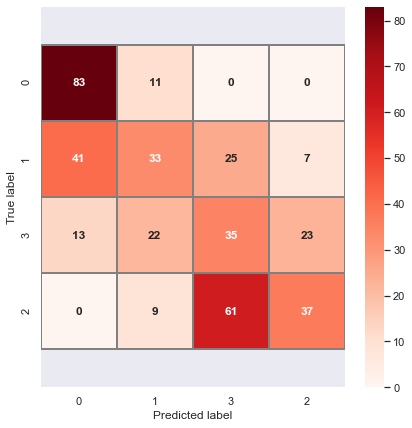

In [12]:
cm = confusion_matrix(nbmclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Multinomial - PCA1

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_PCA1)
train_dataPCA_0_1 = min_max_scaler.fit_transform(train_PCA1)
test_dataPCA_0_1 = min_max_scaler.fit_transform(test_PCA1)

In [14]:
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbmclf.fit(train_dataPCA_0_1,train_target_ravel)
nbmclfPred = nbmclf.predict(test_dataPCA_0_1)
trainScore = nbmclf.score(train_dataPCA_0_1, train_target)
testScore = nbmclf.score(test_dataPCA_0_1, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.254375 
Testing Score: 0.2325


[[  0   0   0   0]
 [  0   0   0   0]
 [ 94 106  93 107]
 [  0   0   0   0]]


Text(39.5, 0.5, 'True label')

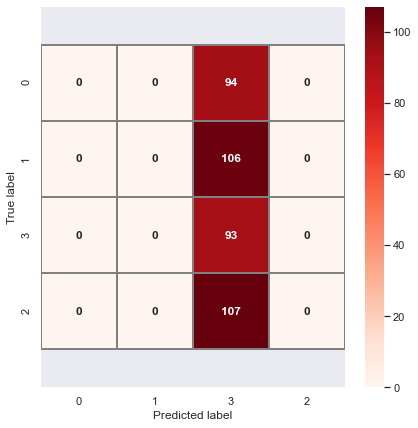

In [15]:
cm = confusion_matrix(nbmclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Multinomial - PCA2

In [16]:
min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(train_PCA2)
train_dataPCA_0_1 = min_max_scaler.fit_transform(train_PCA2)
test_dataPCA_0_1 = min_max_scaler.fit_transform(test_PCA2)

In [17]:
nbmclf = naive_bayes.MultinomialNB()
nbmclf = nbmclf.fit(train_dataPCA_0_1,train_target_ravel)
nbmclfPred = nbmclf.predict(test_dataPCA_0_1)
trainScore = nbmclf.score(train_dataPCA_0_1, train_target)
testScore = nbmclf.score(test_dataPCA_0_1, test_target)
print("Training Score: {} \nTesting Score: {}".format(trainScore, testScore))

Training Score: 0.31875 
Testing Score: 0.2975


[[65 72 44 32]
 [ 0  0  0  0]
 [28 19 16 37]
 [ 1 15 33 38]]


Text(39.5, 0.5, 'True label')

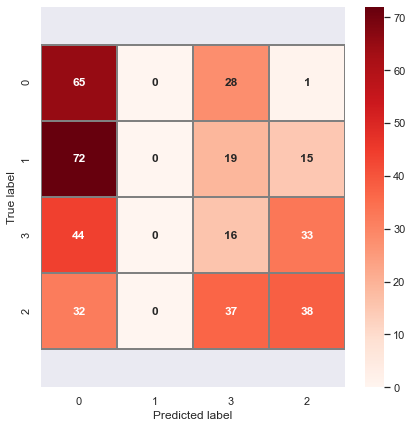

In [18]:
cm = confusion_matrix(nbmclfPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Support Vector Machines

In [19]:
cats = train_target['price_range'].unique()

In [20]:
#param_grid = {'C': [5], 'gamma': [.01]}
param_grid = {'C': [1,5,10,50,100],'gamma': [.0001,.0005,.001,.005,.01]}

##### Linear SVM with PCA1

In [21]:
model = SVC(kernel = 'linear').fit(train_PCA1, train_target_ravel)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(train_PCA1, train_target_ravel)
print(grid.best_params_)

{'C': 1, 'gamma': 0.0001}


In [22]:
finalModel = grid.best_estimator_
linearPred = finalModel.predict(test_PCA1)

In [23]:
acc = accuracy_score(linearPred, test_target)
print(acc)

0.44


[[69 36  8  0]
 [10 18 23  4]
 [ 9 22 15 29]
 [ 6 30 47 74]]


Text(39.5, 0.5, 'True label')

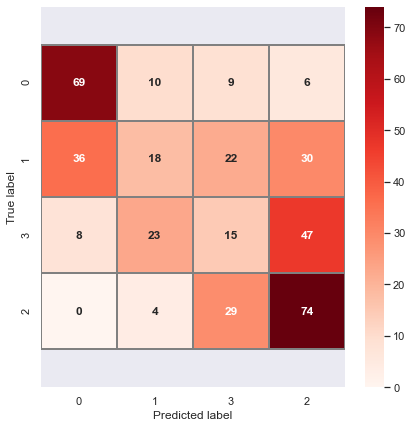

In [24]:
cm = confusion_matrix(linearPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### Linear SVM with PCA2

In [25]:
model = SVC(kernel = 'linear').fit(train_PCA2, train_target_ravel)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(train_PCA2, train_target_ravel)
print(grid.best_params_)

{'C': 100, 'gamma': 0.0001}


In [26]:
finalModel = grid.best_estimator_
linearPred = finalModel.predict(test_PCA2)

In [27]:
acc = accuracy_score(linearPred, test_target)
print(acc)

0.495


[[59 24  2  0]
 [16 21 16  1]
 [ 9 19 31 19]
 [10 42 44 87]]


Text(39.5, 0.5, 'True label')

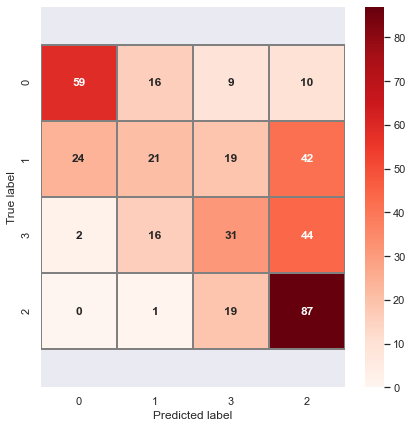

In [28]:
cm = confusion_matrix(linearPred, test_target)
print(cm)
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### RBF SVM with PCA1

In [29]:
model = SVC(kernel = 'rbf').fit(train_PCA1, train_target_ravel)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(train_PCA1, train_target_ravel)
print(grid.best_params_)

{'C': 100, 'gamma': 0.005}


In [30]:
finalModel = grid.best_estimator_
rbfPred = finalModel.predict(test_PCA1)

In [31]:
acc = accuracy_score(rbfPred, test_target)
print(acc)

0.49


Text(39.5, 0.5, 'True label')

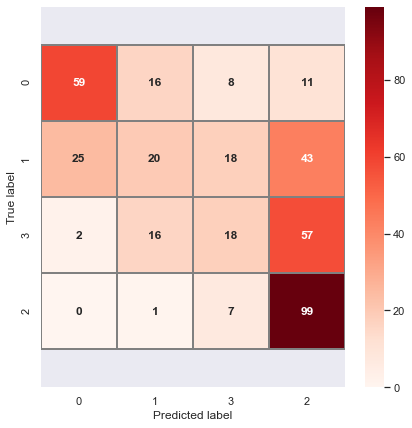

In [32]:
cm = confusion_matrix(rbfPred, test_target)
cm
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

##### RBF SVM with PCA2

In [33]:
model = SVC(kernel = 'rbf').fit(train_PCA2, train_target_ravel)
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(train_PCA2, train_target_ravel)
print(grid.best_params_)

{'C': 10, 'gamma': 0.01}


In [34]:
finalModel = grid.best_estimator_
rbfPred = finalModel.predict(test_PCA2)

In [35]:
acc = accuracy_score(rbfPred, test_target)
print(acc)

0.4975


Text(39.5, 0.5, 'True label')

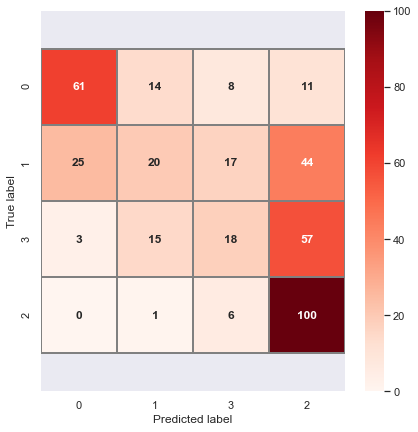

In [36]:
cm = confusion_matrix(rbfPred, test_target)
cm
fig, ax = plt.subplots(figsize=(7,7))
ax = sns.heatmap(cm.T, square=True, linecolor='grey', linewidths=1, annot=True, 
            fmt='d', cbar=True, cmap='Reds', ax=ax, annot_kws={"fontsize":12, "weight":"bold"},
            xticklabels= cats,
            yticklabels= cats)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted label')
plt.ylabel('True label')

### Summary Comparison of Naive Bayes and SVM

##### Naive Bayes
Naives Bayes was performed using the normalized data at the first and second principal components. Multinomial Naive Bayes performed very poorly as did the multinomial and gaussian models when using the principal components. The model when using the full normalized data set and the gaussian distribution model resulted in a 53.75% training score and a 55.5% test score. While this is not ideal for a final model, this was the most promising model of the Naive Bayes models that were run. 
	Due to Naive Bayes assumptions that predictors are independent and normally distributed, it struggled to classify test instances accurately. It specifically struggled to classify the third price range category. Of the 53 group 3 records in the test set, only 5 were categorized correctly. This could be a result of being the most expensive price category. Our data pre-processing showed that among the different components in each of the phones, there was not a significant amount of variance between each price category.

##### Support Vector Machines
The normalized data and the 2 principal components were used to fit a support vector machine model. Linear and Radial Basis Function(RBF) kernels were used as well as grid search to determine the best selection of C for linear kernels and the best combination of C and Gamma for the RBF kernels. The final model selected used the RBF kernel with a C equal to 10 and Gamma equal to .01. It resulted in a 49.75% accuracy. 